## Stat 4609 HW 3
***
In this homework assignment, we want to implement random forest for classification from scratch based on the decision tree.


The algorithm of the random forest is shown below.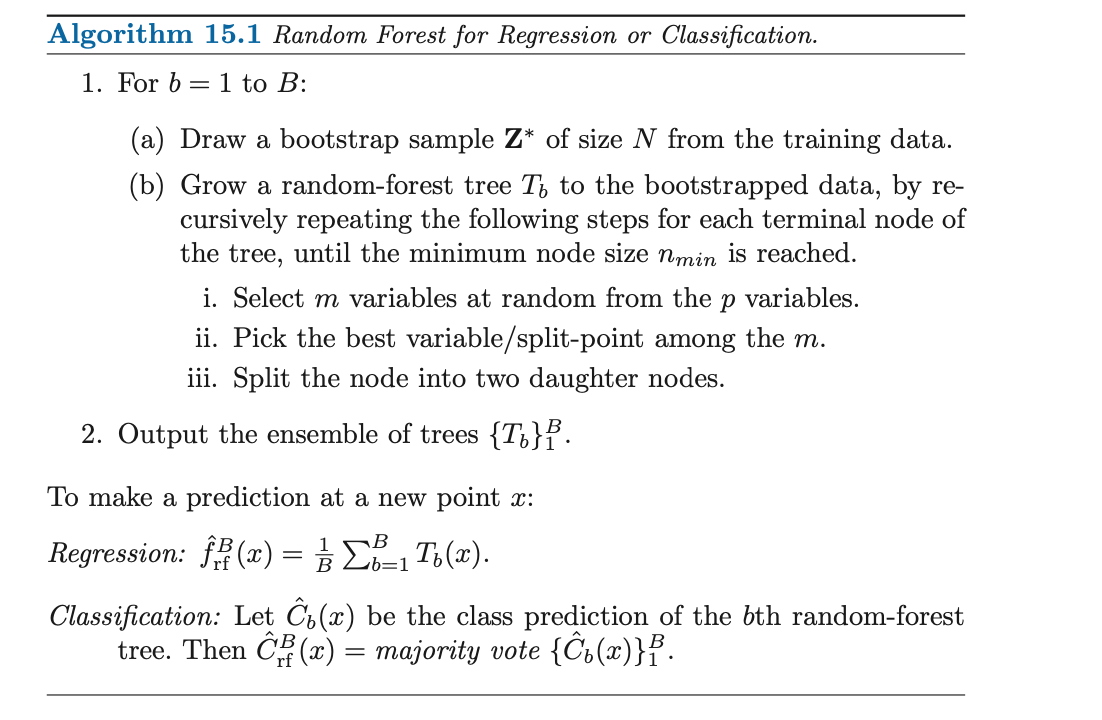)

## This task consists of two parts, a short essay, and programming. 

##  Part I, you need to write a short essay to answer the following questions. 

1. Please compare Decision Tree method, and Random Forest for classification task. If necessary, please include references properly.

   

3. Please illustrate how you could implement random forest with the help of python class ```DecisionTree```. *You can write some pseudo code for better illustration.*


[The short essay should be around 500 words. ] 


Decision Tree and Random Forest are supervised learning algorithms used for classification tasks, but they have different characteristics and applications. A Decision Tree classifier takes the form of a tree structure. A Decision Tree has a root node, internal nodes that represent features, branches that represents decision rules, and leaf nodes that represent the outcome. Starting from the root node, a Decision Tree grows by recursively partitioning the dataset based on the attribute value. After the tree is grown, the decision tree can be used to classify new instances by following the Decision Tree flowchart.

Decision Trees have significant advantages as a classification model. First, they have great interpretability, since they are similar to the human decision-making process, just like a flowchart, making them easily visualised. They are also easy to use in many different datasets. They can handle both numerical and categorical data and are non-parametric, which means they do not require any assumptions of linearity in the data.

However, despite the advantages, Decision Trees also come with limitations. Decision Trees are prone to overfitting the training data, which means that a small change in the training data can lead to a very different tree structure. Due to this limitation, Decision Trees are set with restrictions such as maximum depth and the number of leaf nodes. There are also techniques, such as Decision Tree Pruning, that simplify the decision trees to combat overfitting and remove redundancies.

Random forest builds on top of the Decision Tree concept by creating an ensemble of many decision trees on various sub-samples of the dataset. This leads to a more accurate and stable prediction than a single Decision Tree classifier since it reduces variance and helps avoid overfitting. 

Random Forests have significant advantages over Decision Trees in several aspects. Random Forest often produces a highly accurate classifier. Since it is an ensemble model that uses averaging, it prevents overfitting. It is especially helpful when handling large datasets since it can handle thousands of input variables and identify the most significant ones, so it is considered one of the dimensionality reduction methods. Finally, Random Forests can perform not only classification but also regression.

However, Random Forests aren’t always the better choice for every dataset since they have their own limitations. Due to the ensemble nature of Random Forests, the time complexity is higher than that of a single decision tree. This characteristic also makes it difficult for Random Forests to be interpreted.

Here is a pseudocode of how I would implement a random forest with the help of the class DcisionTree.


```python
class RandomForest:
    def __init__(self, num_trees, max_depth=None):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.num_trees):
            # Bootstrap sampling
            indices = np.random.choice(len(y), len(y), replace=True)
            X_sample, y_sample = X[indices], y[indices]
            # Fit decision tree and append to the ensemble
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        # Majority vote
        forest_preds = mode(tree_preds, axis=0).mode[0]
        return forest_preds   
```

References 

1. Inside Learning Machines. (n.d.). 8 Key Advantages and Disadvantages of Decision Trees. Inside Learning Machines. Retrieved March 20, 2024, from https://insidelearningmachines.com/advantages_and_disadvantages_of_decision_trees/

2. Trehan, D. (2020, July 2). Why Choose Random Forest and Not Decision Trees. Towards AI. Retrieved March 20, 2024, from https://towardsai.net/p/machine-learning/why-choose-random-forest-and-not-decision-trees

3. Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32. doi:10.1023/A:1010933404324de[0]
        return forest_preds


## Part II Implementation of Random forest from scratch. 

### 1. Implement the decision tree


First, you should write a class that implements the decision tree for a classification task. You will need this to fit the Random Forest later.


In [1]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
np.random.seed(1234)

In [2]:
import numpy as np

def gini_index(y):
    if len(y) == 0:
        return 0
    classes, counts = np.unique(y, return_counts=True)
    return 1 - sum((counts / float(len(y))) ** 2)

def cost_misclassification(y):
    class_counts = np.bincount(y)
    return 1 - (np.max(class_counts) / len(y))
    
class DecisionTree:
    class Node:
        def __init__(self, predicted_class):
            self.feature_index = 0
            self.threshold = 0
            self.left = None
            self.right = None
            self.predicted_class = predicted_class

    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1, n_features=None):
        self.max_depth = max_depth
        self.root = None
        self.cost_fn = cost_fn
        self.num_classes = num_classes
        self.min_leaf_instances = min_leaf_instances
        self.n_features = n_features

    def fit(self, X, y, n_features=None):
        self.num_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.n_features = n_features if n_features is not None else self.n_features_
        self.root = self.grow_tree(X, y)

    def grow_tree(self, X, y, depth=0):
        samples_per_class = [np.sum(y == c) for c in range(self.num_classes_)]
        predicted_class = np.argmax(samples_per_class)
        node = self.Node(predicted_class=predicted_class)

        if depth < self.max_depth:
            idx, thr = self.best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                indices_right = ~indices_left
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[indices_right], y[indices_right]
                node.feature_index = idx
                node.threshold = thr
                if len(y_left) >= self.min_leaf_instances and len(y_right) >= self.min_leaf_instances:
                    node.left = self.grow_tree(X_left, y_left, depth + 1)
                    node.right = self.grow_tree(X_right, y_right, depth + 1)
        return node

    def best_split(self, X, y):
        m = len(y)
        if m <= 1:
            return None, None

        best_cost = self.cost_fn(y)
        best_idx, best_thr = None, None
        features = np.random.choice(self.n_features_, self.n_features, replace=False)

        for idx in features:
            sorted_idx = X[:, idx].argsort()
            X_sorted, y_sorted = X[sorted_idx], y[sorted_idx]

            for i in range(1, m):
                if X_sorted[i, idx] == X_sorted[i - 1, idx]:
                    continue
                y_left, y_right = y_sorted[:i], y_sorted[i:]
                cost = (len(y_left) * self.cost_fn(y_left) + len(y_right) * self.cost_fn(y_right)) / m
                if cost < best_cost:
                    best_cost = cost
                    best_idx = idx
                    best_thr = (X_sorted[i, idx] + X_sorted[i - 1, idx]) / 2

        return best_idx, best_thr

    def predict(self, X):
        predictions = []
        for inputs in X:
            node = self.root
            while node.left is not None and node.right is not None:
                if inputs[node.feature_index] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            predictions.append(node.predicted_class)
        return np.array(predictions)
        

### 2. Let's start work on the implementation of random forest. 
The skeleton of python class ```randomforest``` is provided. Please, implement the two important python methods, ```fit```, and ```predict```. 

Below is the description for the arguements, 

We are creating a random forest regressor, although the same code can be slightly modified to create a classifier. To start out, we need to know what our black box takes as input to yield the output (prediction) so we need to know the parameters that define our random forest :
x: independent variables of training set. To keep things minimal and simple I am not creating a separate fit method hence the base class constructor will accept the training set.

- ```x or y```: the random and corresponding dependent variables necessary for supervised learning (Random forest is a supervised learning technique)
- ```n_trees``` : number of uncorrelated trees we ensemble to create the random forest.
- ```n_features```: the number of features to sample and pass onto each tree, this is where feature bagging happens. It can either be ```"sqrt"```, ```"log2"``` or an integer. In case of sqrt, the number of features sampled to each tree is square root of total features and log base 2 of total features in case of log2.

- ```sample_size```: the number of rows randomly selected and passed onto each tree. This is usually equal to total number of rows but can be reduced to increase performance and decrease correlation of trees in some cases (bagging of trees is a completely separate machine learning technique)
depth: depth of each decision tree. Higher depth means more number of splits which increases the over fitting tendency of each tree but since we are aggregating several uncorrelated trees, over fitting of individual trees hardly bothers the whole forest.
- ```min_leaf```: minimum number of samples required in a node to cause further split. Lower the min_leaf, higher the depth of the tree.

- ``` cost_fn```: objective function for decision tree. 



In [3]:
class RandomForest:
    def __init__(self, depth=10, min_leaf=5, n_trees=8, n_features='log2', sample_sz=20, cost_fn=cost_misclassification):
        np.random.seed(12)
        self.depth, self.min_leaf = depth, min_leaf 
        self.n_trees = n_trees 
        self.sample_sz, self.n_features =  sample_sz, n_features
        self.cost_fn = cost_fn 
        self.trees = [] # ensemble of trees

    def fit(self, X, y):
        self.trees = [self.create_tree(X, y) for _ in range(self.n_trees)]

    def create_tree(self, X, y):
        # (a) draw bootstrap sample
        indices = np.random.choice(len(y), self.sample_sz, replace=True)
        X_sample = X[indices]
        y_sample = y[indices]
        
        if self.n_features == 'sqrt':
            n_features = int(np.sqrt(X.shape[1]))
        elif self.n_features == 'log2':
            n_features = int(np.log2(X.shape[1]))
        else:
            n_features = self.n_features

        # (b) grow tree
        tree = DecisionTree(max_depth=self.depth, cost_fn=self.cost_fn, min_leaf_instances=self.min_leaf)
        tree.fit(X_sample, y_sample, n_features)
        return tree

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)  # each row => sample
        predictions = [np.bincount(tree_pred).argmax() for tree_pred in tree_preds]
        return np.array(predictions)

### Part 3 Experiments and visualization. 

In this section, you need to use the self-implemented random forest to build classification model for Iris dataset. 

(1) We fit the random forest to the training data and predict on the test data. Please also report the test accuracy. [It should be about or higher than 96%] 

*Please use gini index as the cost function.*


(2) Please visualize the result using scattered plots, with the following elements.
- Only use the first two features as the x and y axis for the 2D visualization. 

- Use different shape to represent training data and testing data.

- Use different color to represent different labels.

- Use different shape to mark correct prediction and misclassificaiton for testing samples. 

- Include a legend for the above symbols. 





In [4]:
## Load data
from sklearn import datasets
dataset = datasets.load_iris()
X, y = dataset['data'], dataset['target']
(num_instances, num_features), num_classes = X.shape, np.max(y)+1
inds = np.random.permutation(num_instances)
#train-test split)
X_train, y_train = X[inds[:100]], y[inds[:100]]
X_test, y_test = X[inds[100:]], y[inds[100:]]

In [5]:
# Decision Tree
tree = DecisionTree(max_depth=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = np.sum(y_pred == y_test) / float(len(y_test))
print(f"Decision tree accuracy: {accuracy}")

# Random Forest
forest = RandomForest(depth=10, min_leaf=5, n_trees=20, cost_fn=gini_index)
#forest = RandomForest(depth=10, min_leaf=5, n_trees=8, n_features='log2', sample_sz=20, cost_fn=cost_misclassification)

forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
accuracy_forest = np.sum(y_pred_forest == y_test) / float(len(y_test))
print(f"Random forest accuracy: {accuracy_forest}")

Decision tree accuracy: 0.96
Random forest accuracy: 0.96


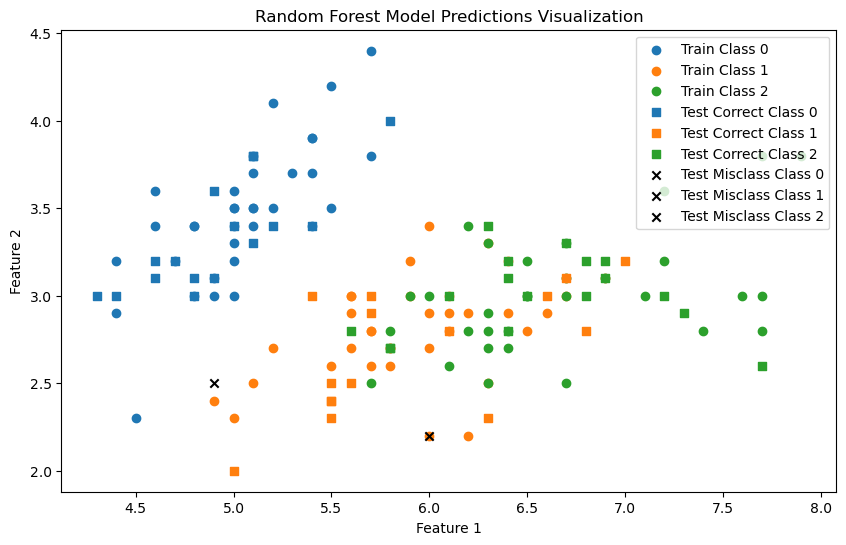

In [6]:
# ----(2) visualization for results ------------------------------------------ 
plt.figure(figsize=(10, 6))

# Circles for training data
for class_value in np.unique(y_train):
    plt.scatter(X_train[y_train == class_value, 0], X_train[y_train == class_value, 1],
                color=plt.cm.tab10(class_value), marker='o', label=f"Train Class {class_value}")

# Squares for correct predictions from testing data
for class_value in np.unique(y_test):
    correct = (y_test == class_value) & (y_pred == class_value)
    plt.scatter(X_test[correct, 0], X_test[correct, 1],
                color=plt.cm.tab10(class_value), marker='s', label=f"Test Correct Class {class_value}")

# Crosses for misclassifications from testing data
incorrect = y_test != y_pred
for class_value in np.unique(y_test):
    incorrect_class = incorrect & (y_test == class_value)
    plt.scatter(X_test[incorrect_class, 0], X_test[incorrect_class, 1],
                color='black', marker='x', label=f"Test Misclass Class {class_value}")

# Create legend and labels
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Model Predictions Visualization')
plt.show()

The intention of this post is to make students and ourselves more familiar with the general working of random forests for it’s better application and debugging in future. Random forests have many more parameters and associated complexities that could not be covered in a single post by me. To study a more robust and wholesome code I suggest you read the sklearn module’s random forest code which is open source. 

